In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pyccl as ccl

We want to compare the matter power spectrum as output manually from class with massive neutrinos nonzero to the power spectrum as output from class via ccl for the same parameters. This is a sanity check.

In [2]:
OmegaC   = 0.25
OmegaB   = 0.05
h        = 0.7
As       = 2.1*10**(-9)

#OmegaL    = [0.7, 0.7, 0.7, 0.65, 0.75]
Omegak    = [0., 0., 0.]
w0        = [-1., -0.9, -0.9]
wa        = [0., 0., 0.1]

mnu = [[0.04,0., 0.], [0.05, 0.01, 0.], [0.03, 0.02, 0.04]]
#N_nu_mass = [1, 2, 3]
#N_nu_rel =[2.0328, 1.0196, 0.00641]
Neff = 3.046
#Neff = [N_nu_rel[i] + N_nu_mass[i] * 0.71611**4 / ((4. / 11.)**(4./3.)) for i in range(0,3)]
print Neff

3.046


In [3]:
# Load class linear and nonlinear power spectra for the 5 different models

lin_pk = [0]*3
lin_k = [0]*3
for mi in range(0,3):
    lin_k[mi], lin_pk[mi] = np.loadtxt('./model'+str(mi+1)+'_pk.dat', unpack=True)


In [4]:
# Loop over models
pk_ccl_lin = [0]*3
for mi in range(0,3):
    p = ccl.Parameters(Omega_c=OmegaC, Omega_b=OmegaB, Neff = Neff, h=h, A_s=As, n_s=0.96, Omega_k=Omegak[mi], w0=w0[mi], wa=wa[mi], m_nu=mnu[mi])
    cosmo = ccl.Cosmology(p)
    pk_ccl_lin[mi] = ccl.power.linear_matter_power(cosmo, lin_k[mi]*h, 1.) * h**3


In [5]:
# Get the fractional difference between power spectra for each model
frac_diff_lin = [0]*3
for mi in range(0,3):
    frac_diff_lin[mi] = np.abs(pk_ccl_lin[mi] - lin_pk[mi]) / lin_pk[mi]

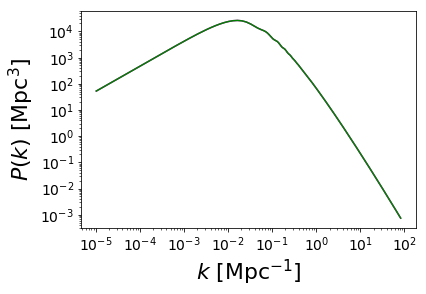

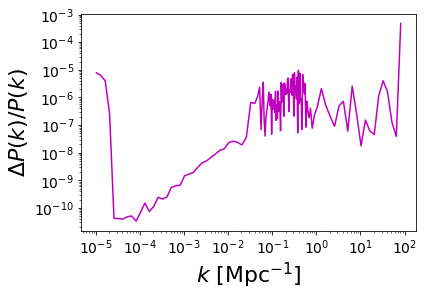

In [10]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(lin_k[0], pk_ccl_lin[0], 'm')
plt.loglog(lin_k[0], lin_pk[0], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(lin_k[0], frac_diff_lin[0], 'm')
plt.show()

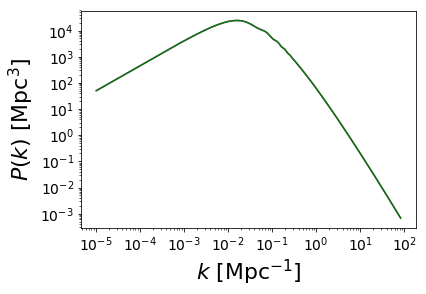

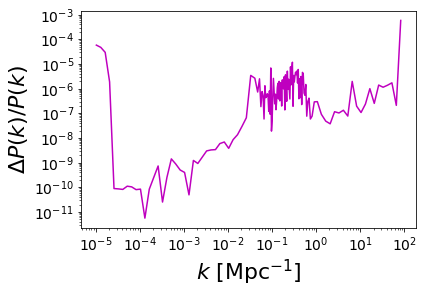

In [11]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(lin_k[1], pk_ccl_lin[1], 'm')
plt.loglog(lin_k[1], lin_pk[1], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(lin_k[1], frac_diff_lin[1], 'm')
plt.show()

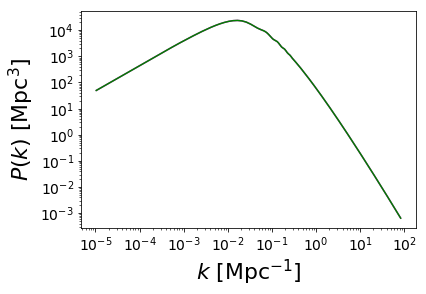

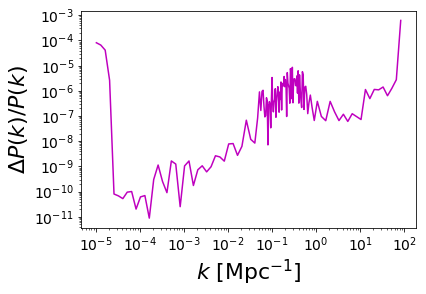

In [12]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(lin_k[2], pk_ccl_lin[2], 'm')
plt.loglog(lin_k[2], lin_pk[2], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(lin_k[2], frac_diff_lin[2], 'm')
plt.show()

Now do nonlinear case

In [14]:
nl_pk = [0]*3
nl_k = [0]*3
for mi in range(0,3):
    nl_k[mi], nl_pk[mi] = np.loadtxt('./model'+str(mi+1)+'_nl_pk.dat', unpack=True)

In [15]:
pk_ccl_nl = [0]*3
for mi in range(0,3):
    p = ccl.Parameters(Omega_c=OmegaC, Omega_b=OmegaB, Neff = Neff, h=h, A_s=As, n_s=0.96, Omega_k=Omegak[mi], w0=w0[mi], wa=wa[mi], m_nu=mnu[mi])
    cosmo = ccl.Cosmology(p)
    pk_ccl_nl[mi] = ccl.power.nonlin_matter_power(cosmo, nl_k[mi]*h, 1.) * h**3

In [16]:
# Get the fractional difference between power spectra for each model
frac_diff_nl = [0]*3
for mi in range(0,3):
    frac_diff_nl[mi] = np.abs(pk_ccl_nl[mi] - nl_pk[mi]) / nl_pk[mi]

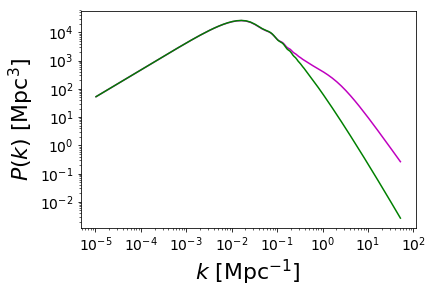

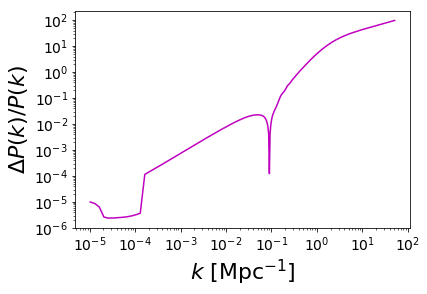

In [18]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(nl_k[0], pk_ccl_nl[0], 'm')
plt.loglog(nl_k[0], nl_pk[0], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(nl_k[0], frac_diff_nl[0], 'm')
plt.show()

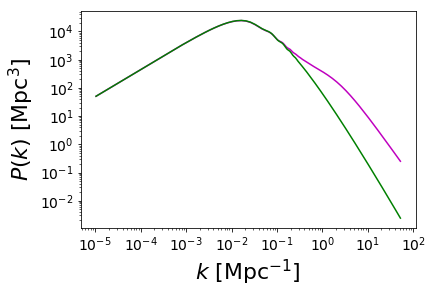

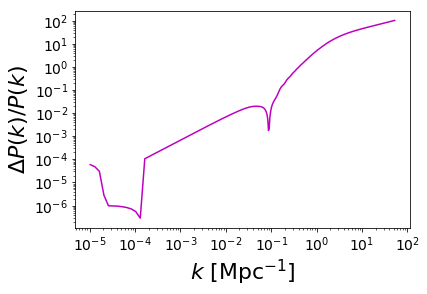

In [19]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(nl_k[1], pk_ccl_nl[1], 'm')
plt.loglog(nl_k[1], nl_pk[1], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(nl_k[1], frac_diff_nl[1], 'm')
plt.show()

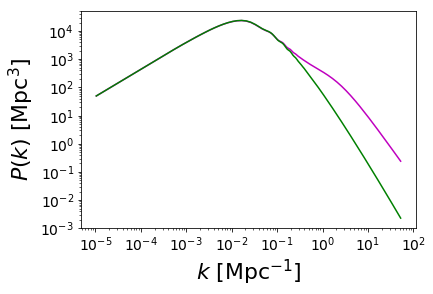

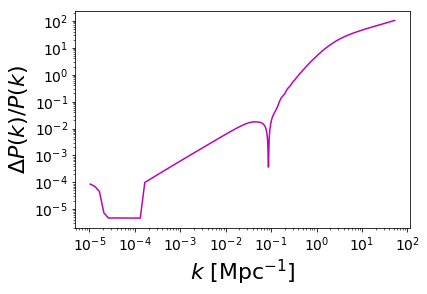

In [20]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]',fontsize=22)
plt.loglog(nl_k[2], pk_ccl_nl[2], 'm')
plt.loglog(nl_k[2], nl_pk[2], 'g')
plt.show()

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.ylabel(r'$\Delta P(k)/P(k)$',fontsize=22)
plt.loglog(nl_k[2], frac_diff_nl[2], 'm')
plt.show()